# Outline

- DE genes
- GO enrichment

# Set environment

In [8]:
source("config_path.R")
source("util_path.R")

## 01 data

In [5]:
#attach(file.path(OUTDIR, "HTS-GroupB-DESeq.RData"))
attach(file.path(OUTDIR, "HTS-GroupAll-DESeq.RData"))

## 02 GO terms

In [4]:
attach(file.path(OUTDIR, "HTS-GO-Info.RData"))

# A quick example

In [129]:
gset_all <- unlist(gset_go_bp)
length(gset_all)

[1] 2543

In [143]:
gset  <- gset_go_bp[["GO:0005975 | carbohydrate metabolic process"]]
print(gset)
tab   <- table(gset_all %in% exp_dw$row, gset_all %in% gset)
print(tab)
test  <- fisher.test(tab, alternative = "greater")
#res   <- c(name, test$estimate, test$p.value)
print(test)

 [1] "CNAG_00057" "CNAG_00121" "CNAG_00373" "CNAG_00393" "CNAG_00596"
 [6] "CNAG_00623" "CNAG_00663" "CNAG_00684" "CNAG_00696" "CNAG_00799"
[11] "CNAG_00827" "CNAG_00939" "CNAG_01155" "CNAG_01216" "CNAG_01230"
[16] "CNAG_01239" "CNAG_01651" "CNAG_01675" "CNAG_01745" "CNAG_01758"
[21] "CNAG_01984" "CNAG_02062" "CNAG_02133" "CNAG_02225" "CNAG_02230"
[26] "CNAG_02351" "CNAG_02445" "CNAG_02588" "CNAG_02598" "CNAG_02834"
[31] "CNAG_03146" "CNAG_03225" "CNAG_03247" "CNAG_03266" "CNAG_03412"
[36] "CNAG_03769" "CNAG_04025" "CNAG_04033" "CNAG_04065" "CNAG_04245"
[41] "CNAG_04526" "CNAG_04631" "CNAG_04874" "CNAG_05138" "CNAG_05243"
[46] "CNAG_05369" "CNAG_05411" "CNAG_05471" "CNAG_05480" "CNAG_05607"
[51] "CNAG_05652" "CNAG_05766" "CNAG_05799" "CNAG_05803" "CNAG_05913"
[56] "CNAG_06260" "CNAG_06291" "CNAG_06313" "CNAG_06336" "CNAG_06515"
[61] "CNAG_06593" "CNAG_06659" "CNAG_06666" "CNAG_06770" "CNAG_06923"
[66] "CNAG_06924" "CNAG_06931" "CNAG_06936" "CNAG_06985" "CNAG_07559"
[71] "CNAG_07600" "C

# GO enrichment analysis

In [14]:
enrichment <- function(ddsres, pvalue, lfc, mygeneset){
    tmp    <- ddsres
    #tmp    <- tmp %>% filter(padj < 0.05, abs(log2FoldChange) > 1)
    tmp    <- tmp %>% filter(padj < 0.05)
    exp_up <- tmp %>% filter(log2FoldChange > 0)
    exp_dw <- tmp %>% filter(log2FoldChange < 0)
    
    cat("\n", 
        "#gene up:  ", nrow(exp_up), "\n", 
        "#gene down:", nrow(exp_dw), "\n")
    
    gset_all <- unlist(mygeneset)
    cat("", "#gene in reference:", length(gset_all))
    
    out <- list()
    tmp <- sapply(names(mygeneset), function(name){
        gset  <- mygeneset[[name]]
        tab   <- table(gset_all %in% exp_up$row, gset_all %in% gset)
        test  <- fisher.test(tab, alternative = "greater")
        res   <- c(name, test$estimate, test$p.value)
        names(res) <- c('name', 'esitmate', 'pvalue')
        return(res)
    })
    out$greater <- as.tibble(t(tmp)) %>% 
        mutate(padj = p.adjust(pvalue, "BH")) %>% 
        filter(padj < 0.05)
    
    
    
    tmp <- sapply(names(mygeneset), function(name){
        gset  <- mygeneset[[name]]
        tab   <- table(gset_all %in% exp_dw$row, gset_all %in% gset)
        test  <- fisher.test(tab, alternative = "greater")
        res   <- c(name, test$estimate, test$p.value)
        names(res) <- c('name', 'esitmate', 'pvalue')
        return(res)
    })
    
    out$less <- as.tibble(t(tmp)) %>% 
        mutate(padj = p.adjust(pvalue, "BH")) %>% 
        filter(padj < 0.05)
    
    
    return(out)
    
}

res_media_h99,  res_media_mar,
res_strain_ypd, res_strain_tc,

## 01 YPD -> TC in H99

In [15]:
res <- res_media_h99
go_media_h99 <- list()

go_media_h99$bp <- enrichment(res, 0.05, 1, gset_go_bp)
go_media_h99$fc <- enrichment(res, 0.05, 1, gset_go_fc)
go_media_h99$cc <- enrichment(res, 0.05, 1, gset_go_cc)


 #gene up:   2410 
 #gene down: 3455 
 #gene in reference: 2543
 #gene up:   2410 
 #gene down: 3455 
 #gene in reference: 3322
 #gene up:   2410 
 #gene down: 3455 
 #gene in reference: 1362

## 02 YPD -> TC in mar1d

In [16]:
res <- res_media_mar
go_media_mar <- list()

go_media_mar$bp <- enrichment(res, 0.05, 1, gset_go_bp)
go_media_mar$fc <- enrichment(res, 0.05, 1, gset_go_fc)
go_media_mar$cc <- enrichment(res, 0.05, 1, gset_go_cc)


 #gene up:   2561 
 #gene down: 3752 
 #gene in reference: 2543
 #gene up:   2561 
 #gene down: 3752 
 #gene in reference: 3322
 #gene up:   2561 
 #gene down: 3752 
 #gene in reference: 1362

## 03 H99 vs mar1d in YPD

In [17]:
res <- res_strain_ypd
go_strain_ypd <- list()

go_strain_ypd$bp <- enrichment(res, 0.05, 1, gset_go_bp)
go_strain_ypd$fc <- enrichment(res, 0.05, 1, gset_go_fc)
go_strain_ypd$cc <- enrichment(res, 0.05, 1, gset_go_cc)


 #gene up:   2057 
 #gene down: 2455 
 #gene in reference: 2543
 #gene up:   2057 
 #gene down: 2455 
 #gene in reference: 3322
 #gene up:   2057 
 #gene down: 2455 
 #gene in reference: 1362

## 04 H99 vs mar1d in TC# Strain TC

In [18]:
res <- res_strain_tc
go_strain_tc <- list()

go_strain_tc$bp <- enrichment(res, 0.05, 1, gset_go_bp)
go_strain_tc$fc <- enrichment(res, 0.05, 1, gset_go_fc)
go_strain_tc$cc <- enrichment(res, 0.05, 1, gset_go_cc)


 #gene up:   1992 
 #gene down: 2115 
 #gene in reference: 2543
 #gene up:   1992 
 #gene down: 2115 
 #gene in reference: 3322
 #gene up:   1992 
 #gene down: 2115 
 #gene in reference: 1362

# Compare

In [23]:
res <- go_media_h99
res$bp$greater %>% select(name)
res$bp$less    %>% select(name)
res$cc$greater %>% select(name)
res$cc$less    %>% select(name)

name
"GO:0006351 | transcription, DNA-templated"
GO:0006364 | rRNA processing
GO:0006396 | RNA processing
GO:0006412 | translation
GO:0006413 | translational initiation
GO:0006414 | translational elongation
GO:0006457 | protein folding
GO:0008033 | tRNA processing
GO:0015986 | ATP synthesis coupled proton transport
GO:0044267 | cellular protein metabolic process


name
GO:0005975 | carbohydrate metabolic process
GO:0055085 | transmembrane transport


name
GO:0005622 | intracellular
GO:0005737 | cytoplasm
GO:0005739 | mitochondrion
GO:0005840 | ribosome
GO:0015934 | large ribosomal subunit
GO:0032040 | small-subunit processome


name
GO:0005783 | endoplasmic reticulum
GO:0016020 | membrane
GO:0016021 | integral component of membrane


In [24]:
res <- go_media_mar
res$bp$greater %>% select(name)
res$bp$less    %>% select(name)
res$cc$greater %>% select(name)
res$cc$less    %>% select(name)

name
"GO:0006351 | transcription, DNA-templated"
GO:0006364 | rRNA processing
GO:0006412 | translation
GO:0006413 | translational initiation
GO:0006414 | translational elongation
GO:0008033 | tRNA processing


name
GO:0005975 | carbohydrate metabolic process
GO:0008152 | metabolic process
GO:0055085 | transmembrane transport


name
GO:0005622 | intracellular
GO:0005737 | cytoplasm
GO:0005743 | mitochondrial inner membrane
GO:0005840 | ribosome
GO:0015934 | large ribosomal subunit
GO:0032040 | small-subunit processome


name
GO:0016020 | membrane
GO:0016021 | integral component of membrane


In [26]:
res <- go_strain_ypd
res$bp$greater %>% select(name)
res$bp$less    %>% select(name)
res$cc$greater %>% select(name)
res$cc$less    %>% select(name)

name
GO:0005975 | carbohydrate metabolic process


name
GO:0006260 | DNA replication
GO:0006364 | rRNA processing
GO:0008033 | tRNA processing


name


name


In [22]:
res <- go_strain_tc
res$bp$greater %>% select(name)
res$bp$less    %>% select(name)
res$cc$greater %>% select(name)
res$cc$less    %>% select(name)

name
GO:0006886 | intracellular protein transport


name
GO:0006260 | DNA replication
GO:0006364 | rRNA processing


name
GO:0016021 | integral component of membrane


name


# visualization

In [1]:
source("config_path.R")
source("util_path.R")

Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Loading required package: S4Vectors
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: ‘BiocGenerics’

The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union

The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs

The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, cbind, colMeans, colnames,


In [2]:
attach(file.path(OUTDIR, "HTS-GroupAll-DESeq.RData"))

In [5]:
annodf <- as.data.frame(colData(rlgexp)[,c("Media", "Strain")])
head(annodf)

,Media,Strain
A_1,YPD,H99
A_13,TC,H99
A_14,TC,H99
A_15,TC,H99
A_2,YPD,H99
A_3,YPD,H99


In [31]:
res <- res_strain_ypd
res <- res %>% filter(padj < 0.05) %>% arrange(log2FoldChange)
genelst <- res$row
head(genelst)

tmp <- annodf[annodf$Media == "YPD",]
rownames(tmp)

[1] "CNAG_03007" "CNAG_06672" "CNAG_05075" "CNAG_04459" "CNAG_00813"
[6] "CNAG_01368"

[1] "A_1"  "A_2"  "A_3"  "B_26" "B_27" "B_4"  "C_10" "C_11" "C_9"  "D_12"
[11] "D_35" "D_36" "E_1"  "E_2"  "E_3"  "F_26" "F_4"  "G_10" "G_11" "G_9" 
[21] "H_12" "H_35" "H_36"

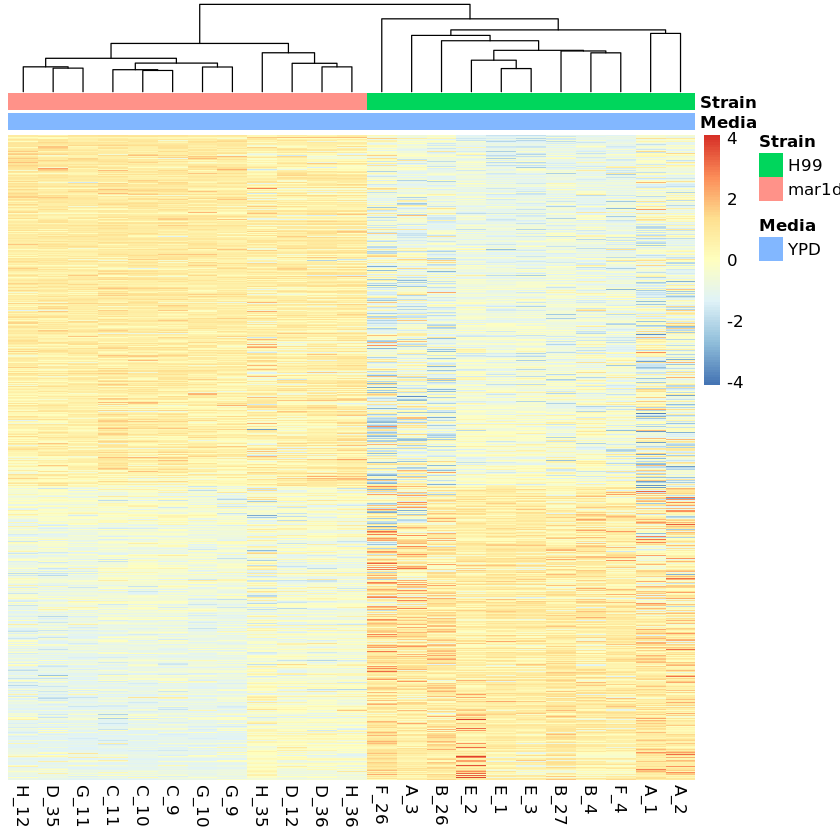

In [32]:
options(repr.plot.width=7, repr.plot.height=7)
pheatmap(assay(rlgexp)[genelst, rownames(tmp)],
         scale = "row",
         annotation_col = annodf,
         cluster_rows = FALSE,
         cluster_cols = TRUE,
        show_rownames = FALSE)

In [26]:
res <- res_strain_tc
res <- res %>% filter(padj < 0.05) %>% arrange(log2FoldChange)
genelst <- res$row
head(genelst)

tmp <- annodf[annodf$Media == "TC",]
rownames(tmp)

[1] "CNAG_01500" "CNAG_04459" "CNAG_04585" "CNAG_02489" "CNAG_01965"
[6] "CNAG_02984"

[1] "A_13" "A_14" "A_15" "B_16" "B_38" "B_40" "C_21" "C_22" "C_23" "D_24"
[11] "D_45" "D_47" "E_13" "E_14" "E_15" "F_38" "F_40" "G_21" "G_22" "G_23"
[21] "H_24" "H_45" "H_47"

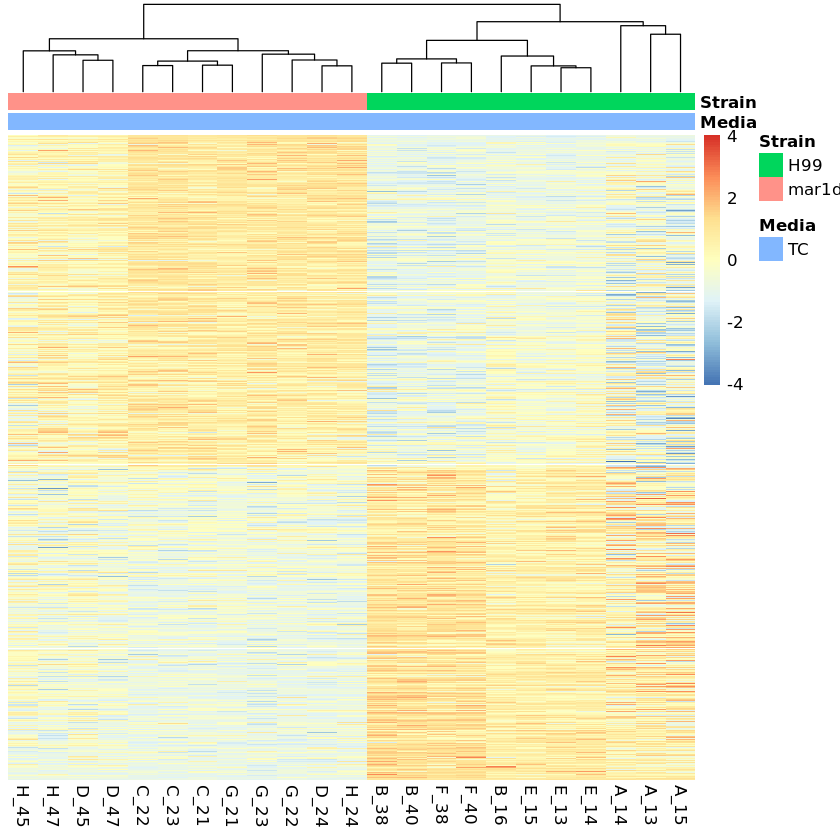

In [28]:
options(repr.plot.width=7, repr.plot.height=7)
pheatmap(assay(rlgexp)[genelst, rownames(tmp)],
         scale = "row",
         annotation_col = annodf,
         cluster_rows = FALSE,
         cluster_cols = TRUE,
        show_rownames = FALSE)

# A quick example

In [31]:
tmp <- enrichment(res_strain_ypd, 0.05, 1, gset_go_cne_h99)
tmp$greater
tmp$less

 #gene up:   699 
 #gene down: 323 
 #gene in reference: 2870

name,esitmate,pvalue,padj
GO:0055085 | transmembrane transport,3.92309800166543,3.32039052448533e-11,2.115089e-08


name,esitmate,pvalue,padj
"GO:0000737, GO:0006259 | DNA catabolic process, endonucleolytic, DNA metabolic process",Inf,1.33119357909903e-05,0.008479703


In [16]:
tmp <- res_media_h99 %>% filter(padj < 0.05, abs(log2FoldChange) > 1)
exp_up <- tmp %>% filter(log2FoldChange > 0)
exp_dw <- tmp %>% filter(log2FoldChange < 0)

print(nrow(exp_up))
print(nrow(exp_dw))
head(tmp)

[1] 726
[1] 1348


row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
CNAG_04548,0.973307,2.344794,0.9133805,2.567160,1.025352e-02,1.559469e-02
CNAG_12001,11.520565,-1.867888,0.2184486,-8.550697,1.223470e-17,5.614865e-17
CNAG_00011,75.746674,-1.667821,0.1241048,-13.438813,3.581334e-41,5.664766e-40
CNAG_00015,28.427100,-2.820591,0.2294769,-12.291392,1.007558e-34,1.125866e-33
CNAG_12002,5.382538,-1.350085,0.3914057,-3.449325,5.619907e-04,9.897720e-04
CNAG_00019,362.277895,1.199309,0.0829932,14.450686,2.482006e-47,5.631871e-46


### a quick try

In [28]:
tab <- table(gset_all %in% exp_up$row, gset_all %in% gset) 
tab

       
        FALSE TRUE
  FALSE  2342   37
  TRUE    468   23

In [13]:
res <- fisher.test(tab, alternative = "greater")
names(res)
res

[1] "p.value"     "conf.int"    "estimate"    "null.value"  "alternative"
[6] "method"      "data.name"


	Fisher's Exact Test for Count Data

data:  tab
p-value = 0.09218
alternative hypothesis: true odds ratio is greater than 1
95 percent confidence interval:
 0.8560916       Inf
sample estimates:
odds ratio 
  1.929225 


In [14]:
print(res$p.value)
print(res$null.value)
print(res$estimate)

[1] 0.09217503
odds ratio 
         1 
odds ratio 
  1.929225 


### GO enrichment

In [43]:
res_enrich_go_YPD <- list()

res <- sapply(names(gset_go_cne_h99), function(name){
    gset  <- gset_go_cne_h99[[name]]
    tab   <- table(gset_all %in% exp_up$row, gset_all %in% gset)
    test  <- fisher.test(tab, alternative = "greater")
    res   <- c(name, test$estimate, test$p.value)
    names(res) <- c('name', 'esitmate', 'pvalue')
    return(res)
})

res <- as.tibble(t(res)) %>% 
    mutate(padj = p.adjust(pvalue, "BH")) %>% 
    filter(padj < 0.05)

res_enrich_go_YPD$up <- res
#######################################################################
res <- sapply(names(gset_go_cne_h99), function(name){
    gset  <- gset_go_cne_h99[[name]]
    tab   <- table(gset_all %in% exp_dw$row, gset_all %in% gset)
    test  <- fisher.test(tab, alternative = "greater")
    res   <- c(name, test$estimate, test$p.value)
    names(res) <- c('name', 'esitmate', 'pvalue')
    return(res)
})

res <- as.tibble(t(res)) %>% 
    mutate(padj = p.adjust(pvalue, "BH")) %>% 
    filter(padj < 0.05)

res_enrich_go_YPD$dw <- res

In [44]:
res_enrich_go_YPD$up

name,esitmate,pvalue,padj
GO:0005975 | carbohydrate metabolic process,3.10909692287215,6.19894446029213e-05,1.974364e-02
GO:0006012 | galactose metabolic process,Inf,0.000144091958225686,3.059553e-02
GO:0055085 | transmembrane transport,2.32734993166745,5.96133750892924e-08,3.797372e-05


In [45]:
res_enrich_go_YPD$dw

name,esitmate,pvalue,padj
GO:0006260 | DNA replication,11.0597242236748,4.8794477281841e-07,1.554104e-04
"GO:0006351 | transcription, DNA-templated",3.6888864062951,0.000169692625351238,2.702355e-02
GO:0006364 | rRNA processing,Inf,5.73616345201686e-09,3.653936e-06
GO:0042254 | ribosome biogenesis,36.1791084042652,0.00014600623673806,2.702355e-02
"GO:0055114, GO:0008033 | oxidation-reduction process, tRNA processing",Inf,0.000222907133133553,2.839837e-02


## 02 Under TC

In [46]:
tmp <- res_Strain_TC %>% filter(padj < 0.05, abs(log2FoldChange) > 0.5)
exp_up <- tmp %>% filter(log2FoldChange > 0)
exp_dw <- tmp %>% filter(log2FoldChange < 0)

print(nrow(exp_up))
print(nrow(exp_dw))
head(tmp)

[1] 891
[1] 753


row,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj
CNAG_00002,69.22420,0.5304340,0.07086820,7.484796,7.165814e-14,1.297172e-12
CNAG_12001,11.52057,0.8159986,0.13569625,6.013420,1.816492e-09,1.710653e-08
CNAG_00011,75.74667,1.0381881,0.09856834,10.532673,6.107509e-26,3.395242e-24
CNAG_00012,174.56368,-0.5573392,0.07677173,-7.259694,3.879674e-13,6.245815e-12
CNAG_00019,362.27790,-0.5558368,0.07752878,-7.169425,7.531355e-13,1.159743e-11
CNAG_12004,2.14219,2.0462249,0.36749558,5.568026,2.576417e-08,2.012121e-07


### GO enrichment

In [47]:
res_enrich_go_TC <- list()

res <- sapply(names(gset_go_cne_h99), function(name){
    gset  <- gset_go_cne_h99[[name]]
    tab   <- table(gset_all %in% exp_up$row, gset_all %in% gset)
    test  <- fisher.test(tab, alternative = "greater")
    res   <- c(name, test$estimate, test$p.value)
    names(res) <- c('name', 'esitmate', 'pvalue')
    return(res)
})

res <- as.tibble(t(res)) %>% 
    mutate(padj = p.adjust(pvalue, "BH")) %>% 
    filter(padj < 0.05)

res_enrich_go_TC$up <- res
#######################################################################
res <- sapply(names(gset_go_cne_h99), function(name){
    gset  <- gset_go_cne_h99[[name]]
    tab   <- table(gset_all %in% exp_dw$row, gset_all %in% gset)
    test  <- fisher.test(tab, alternative = "greater")
    res   <- c(name, test$estimate, test$p.value)
    names(res) <- c('name', 'esitmate', 'pvalue')
    return(res)
})

res <- as.tibble(t(res)) %>% 
    mutate(padj = p.adjust(pvalue, "BH")) %>% 
    filter(padj < 0.05)

res_enrich_go_TC$dw <- res

In [48]:
res_enrich_go_TC$up

name,esitmate,pvalue,padj
GO:0035434 | copper ion transmembrane transport,47.8781915403914,4.32035245994907e-05,1.376032e-02
GO:0055085 | transmembrane transport,3.00090632691812,2.49389173502682e-09,1.588609e-06


In [49]:
res_enrich_go_YPD$dw

name,esitmate,pvalue,padj
GO:0006260 | DNA replication,11.0597242236748,4.8794477281841e-07,1.554104e-04
"GO:0006351 | transcription, DNA-templated",3.6888864062951,0.000169692625351238,2.702355e-02
GO:0006364 | rRNA processing,Inf,5.73616345201686e-09,3.653936e-06
GO:0042254 | ribosome biogenesis,36.1791084042652,0.00014600623673806,2.702355e-02
"GO:0055114, GO:0008033 | oxidation-reduction process, tRNA processing",Inf,0.000222907133133553,2.839837e-02
